<csv 전처리>

<h1>CSV 전처리</h1>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('autos.csv', sep=',', encoding='ISO-8859-1') # 그냥 import 하면 독일어 몇 개가 missing으로 됨. 

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
# df = df.drop(df.loc[:, 'd_seller':'hoursBeforeSale'], axis=1) # stata 뻘짓 지우는 코드. 신경 안 써도 됨. 

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
df.describe(include = "all") # unique로 categorical values 몇 개 인지 확인. 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [7]:
# column들 under로 변경. 
df.columns = map(str.lower, df.columns)

<h1>Date column들 datetime으로 변경. </h1>

In [8]:
for i in ['datecrawled', 'datecreated', 'lastseen']:
    df[i] = pd.to_datetime(df[i], format="%Y-%m-%d %H:%M:%S", errors = 'ignore')

In [9]:
for i in ['datecrawled', 'datecreated', 'lastseen']:
    print(df[i].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [10]:
type(df['lastseen'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06


<h1>Categorical values 들어있는 칼럼들 모두 category type으로 변경. </h1>

In [12]:
for i in ['seller', 'offertype', 'abtest', 'vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaireddamage' ]:
    df[i] = df[i].astype('category')

<h1> timeBeforeSale = lastseen - datecreated 생성.  </h1>

In [13]:
df["timeBeforeSale"] = (df.lastseen - df.datecreated).astype('timedelta64[ns]')

<h1> price의 upperbound 찾기. (높은 가격 제거)</h1>

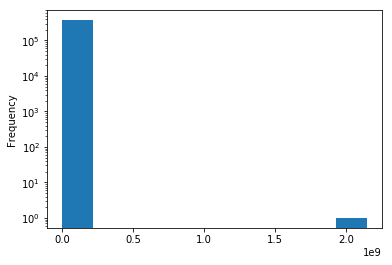

In [16]:
df2 = df['price'].plot(kind='hist', log=True) #지나치게 큰 특이값 때문에 log를 취해야 간신히 보인다. 

In [35]:
df[['name', 'price', 'model', 'brand']].sort_values(by='price')

,name,price,model,brand
179407,Renault_Megane_Scenic,501,megane,renault
150686,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,501,astra,opel
120563,Fiat_punto_60_ps,501,punto,fiat
118952,Export_Haendler,501,NaN,sonstige_autos
114373,Zuverlaessiger_Space_Star,505,andere,mitsubishi
57253,Smart_fortwo_mit_Frontschaden,505,NaN,sonstige_autos
206316,BMW_316i_compact_in_weiss___Teilespender_oder_...,510,NaN,bmw
282935,Mitsubishi_Colt_1.3_Sport,510,colt,mitsubishi
336202,BMW_316i_compact_in_weiss_als_Teilespender_ode...,510,NaN,bmw
340568,escort_16.v_mit_90_ps_faehrt_klasse,510,escort,ford


In [18]:
df = df[df.price < 99999999]

In [25]:
df = df[df.price != (12345678 or 123456)]

In [26]:
df = df[df.price != 11111111]

숫자가 높은 것들 중 대충 쓴 것이나 딱 봐도 싼 모델들이 포함되어있으나 노가다로 제외하기엔 많고 애매하다. 

<h1>price의 lowerbound 찾기. (낮은 가격 제거)</h1>

1 euro = 1254원이다. (현재 기준.) 
10000 euro = 12577798원이다. (천이백오십칠만원) 
중고차(gebrauchtwagen) 을 검색해서 https://www.gebrauchtwagen.at 라는 독일 사이트에 들어가 중고차 가격을 확인한 결과, 
놀랍게도 500유로(62만8천원)짜리 차도 검색이 된다. [- 500 유로가 최소다.] 차라리 폐차하는게 나을 정도의 차이긴 하지만, 검색이 된다는 점에서 500 유로 이상의 값은 함부로 지울 수 없다. 하지만 전체 데이터에서 price < 500인 observation은 24000개나 된다. 
따라서 일단 price < 500인 차들을 drop시키되, 추후 다시 살릴 방법을 찾아본다. 

중고차 가격의 scale이 쓰는 사람마다 제각각 다르기 때문이다. 가령 30M = 3000만이지만, 30이라고 적을 수도 있다. 

In [29]:
df = df[df.price > 500]

<h1> price 전처리 마무리 </h1>

이제 다시 히스토그램을 그려보자. 

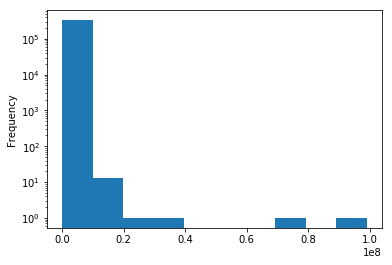

In [31]:
df2 = df['price'].plot(kind='hist', log=True) # 아직도 앞에 다 몰려있다. 

In [39]:
one_bin = (max(df['price']) - min(df['price'])) / 10 # bins의 default 값이 10이기 때문. histogram의 1개 bin의 range를 알아보기 위함. 

In [40]:
one_bin

9899949.9

히스토그램 첫 번째 막대기의 observations들만 꺼내서 다시 히스토그램을 그려보자. 

In [41]:
df2 = df[df.price < one_bin]

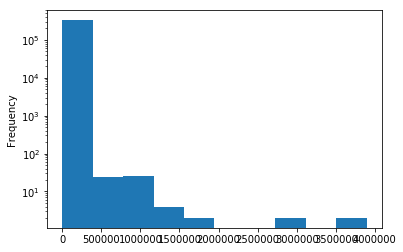

In [42]:
df2['price'].plot(kind='hist', log=True)

In [43]:
max(df2['price'])

3895000

이렇듯, 계속 첫 막대기가 제일 크다. 즉, 대부분의 값들은 적은 수를 가지고 있는데 소수의 outlier가 지나치게 값이 높은 것이다. 
통계프로그램인 STATA에서 명령어를 통해 확인해 본 결과, price <10 와 아주 높은 가격 중 이상한 것만 제외한 (파이썬의 과정과 같이) dataframe의 누적분포를 찍어보면
***
`
                            price <br>
------------------------------------------------------------- <br>
      Percentiles      Smallest <br>
 1%          150             10 <br>
 5%          399             10 <br>
10%          600             10       Obs             358,691 <br>
25%         1250             10       Sum of Wgt.     358,691 <br>
<br>
50%         3000                      Mean           7087.896 <br>
                        Largest       Std. Dev.      227844.1 <br>
75%         7490       2.73e+07 <br>
90%        14300       3.25e+07       Variance       5.19e+10 <br>
95%        19900       7.42e+07       Skewness       341.3023 <br>
99%        36000       9.90e+07       Kurtosis       132565.9 <br>
`
***
이렇게 나온다. 
즉, 99%의 observation은 price < 36000안에 있다. 
따라서 upperbound는 어쩌면 상위 1%를 버리고 하는 것이 바람직할 수도 있다. 

이 price 전처리의 최대 관건은 price scale의 문제로, 36000 euro = 4500만원으로 말이 되지만 매우 낮은 lowerbound의 값들은 도저히 자동차의 가격이라고 보기 힘든 경우가 많다. 특히, price 숫자가 굉장히 작은데 model은 매우 비싼 모델인 경우가 있다.

따라서 추후 최대한 유의미한 값들을 살리기 위해 model별로 (911, a7 등. df['model', 'brand']에서 model 컬럼은 unique identifier이라고 생각된다. - 구체적 확인 필요.) 1분위~3분위의 observation들을 평균 낸 다음 이를 해당 model들에게 imputation 해주는 것도 가능할 것이라 생각한다. 그게 꼭 좋은겆지는 모르겠지만... 

## 지희야 읽어봐 (아래)

In [44]:
df # 최종적으로 price 정리된 dataframe. 이거로 해볼 수 있을 듯. 왜냐면 진짜 마세라티나 부카티, 911 이런건 이렇게 높은 가격이 맞기 때문. 
# df = df[df.price < 36000] # 하지만 그런거를 빼고 99% 안의 '안전한' 값들만 돌릴 경우 이 라인을 추가해서 다 제거하고 돌리면 됨. 

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen,timeBeforeSale
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14 days 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,22 days 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,4 days 18:18:39
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:13,0 days 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06,14 days 17:17:06
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26,0,96224,2016-04-06 10:45:34,11 days 10:45:34
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07,0,57290,2016-04-07 10:25:17,0 days 10:25:17
